In [152]:
import numpy as np
from matplotlib import pyplot as plt 

In [153]:
# Define known Barker codes
barker_codes = {
    2: np.array([1, 1]),
    3: np.array([1, 1, -1]),
    4: np.array([1, 1, 1, -1]),
    5: np.array([1, 1, 1, -1, 1]),
    7: np.array([1, 1, 1, -1, -1, 1, -1]),
    11: np.array([1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1]),
    13: np.array([1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1])
}

[]

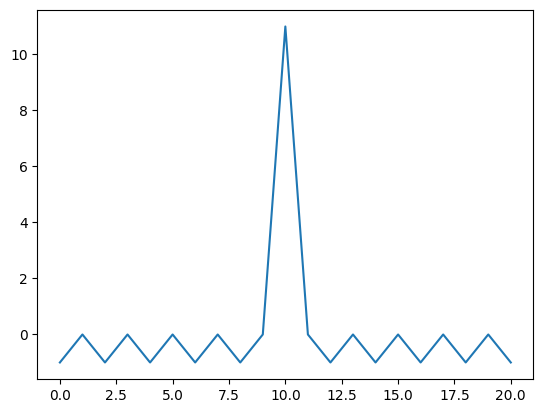

In [154]:
def get_barker_code(length):
    """
    Returns the Barker code for a given length.
    Raises a ValueError if the length is not a known Barker code length.
    """
    if length in barker_codes:
        return barker_codes[length]
    else:
        raise ValueError(f"No Barker code known for length {length}. Known lengths are: {list(barker_codes.keys())}")

barker_11 = get_barker_code(11)
autocorr_11 = np.convolve(barker_11, barker_11[::-1])
plt.plot(autocorr_11)
plt.plot()


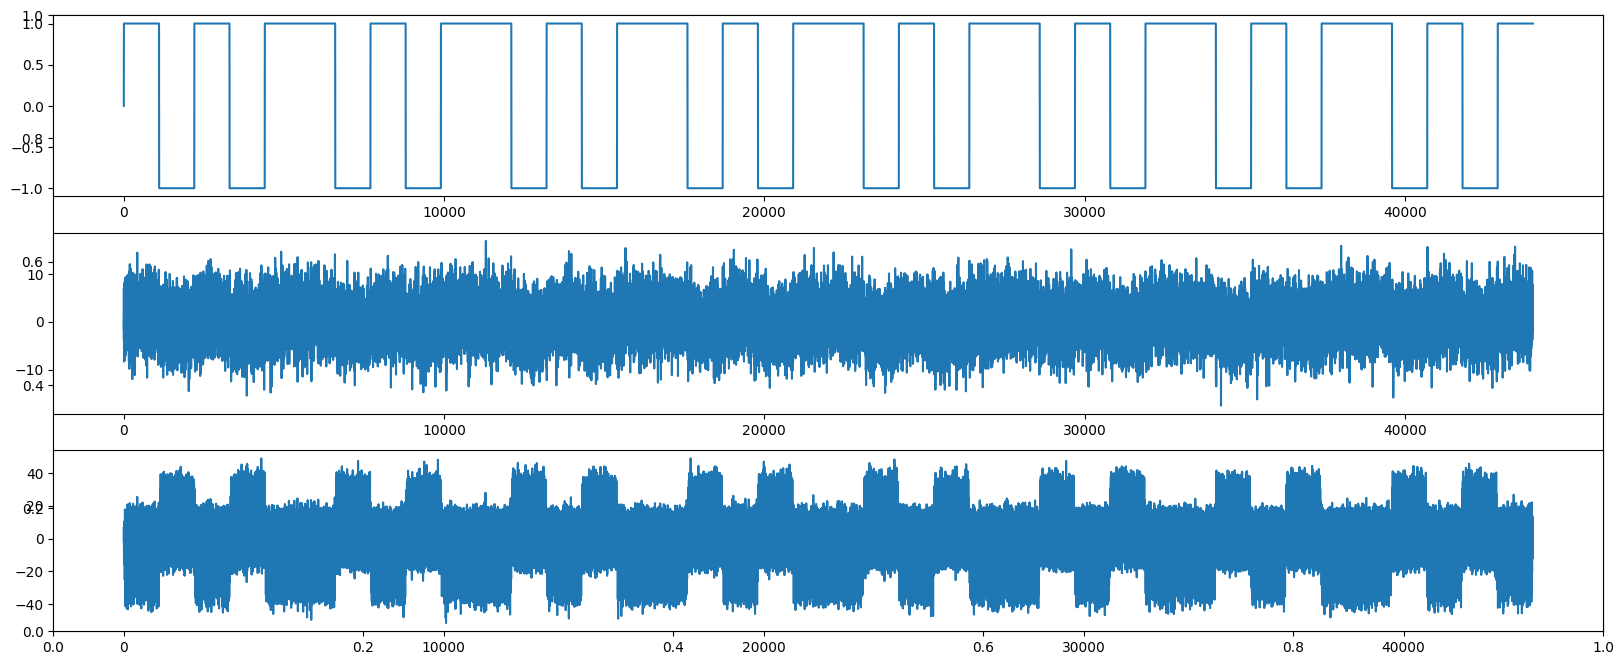

In [181]:
N = 8
t= np.linspace(0, N, 1)
pulses = np.array([1, -1, 1, - 1 ,1])
x = np.repeat(pulses , 1100, axis=0)
b11 = 0
for i in range(len(x)//11): b11 = np.append(b11, barker_11)

b11 = b11[:len(b11)-1]
y= 0
ys =0
for i in range(N): y = np.append(y, x*b11)
for i in range(N): ys = np.append(ys, x)
rx = np.convolve(np.append(barker_11, [barker_11, barker_11, barker_11]), y)

n = 4*np.random.randn(len(rx))

rx = rx + n
fig, ax = plt.subplots(figsize=(20, 8)) 

plt.subplot(311)
plt.plot(ys)
plt.subplot(312)
plt.plot(ys + n[:len(ys)])
plt.subplot(313)
plt.plot(rx)
plt.show()